In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class AAFunc:
    def __call__(self, x):
        return self.func_grad(x, flag=0)

    def gradient(self, x):
        return self.func_grad(x, flag=1)

    def func_grad(self, x, flag=2):
        
        if flag == 0:
            if x < -1:
                fx = x**2/20 - 24.9*x -12.45 
            elif x < 1:
                fx = 12.5*x**2
            else:
                fx = x**2/20 + 24.9*x - 12.45 
            return fx
        
        if x < -1: 
            g = 0.1*x - 24.9
        elif x < 1:
            g = 25*x
        else:
            g = 0.1*x + 24.9

        if flag == 1:
            return g

        # return both function value and gradient
        if x < -1:
            fx = x**2/20 - 24.9*x - 12.45 
        elif x < 1:
            fx = 12.5*x**2
        else:
            fx = x**2/20 + 24.9*x - 12.45 
        
        return fx, g


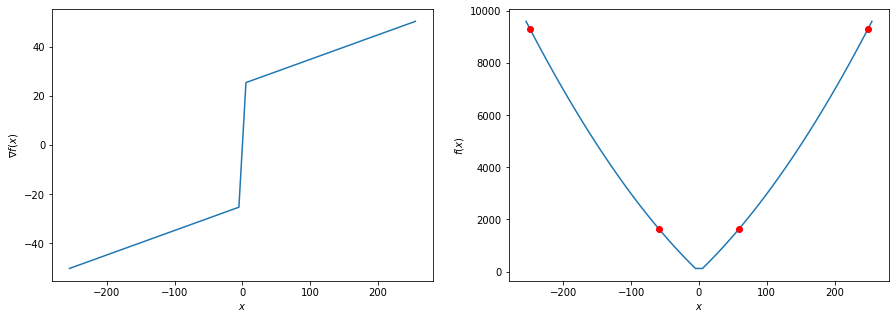

In [3]:
f = AAFunc()

fig, [ax1,ax2] = plt.subplots(1,2, figsize=(15, 5))
xx= np.linspace(-255,255)

ax1.plot(xx, [f.gradient(x) for x in xx ])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\nabla{f(x)}$')
ax2.plot(xx, [f(x) for x in xx])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$f(x)$')
ax2.plot(-249, f(-249),'ro')
ax2.plot(-249*(np.sqrt(5)-2), f(-249*(np.sqrt(5)-2)),'ro')
ax2.plot(249, f(249),'ro')
ax2.plot(249*(np.sqrt(5)-2), f(249*(np.sqrt(5)-2)),'ro')

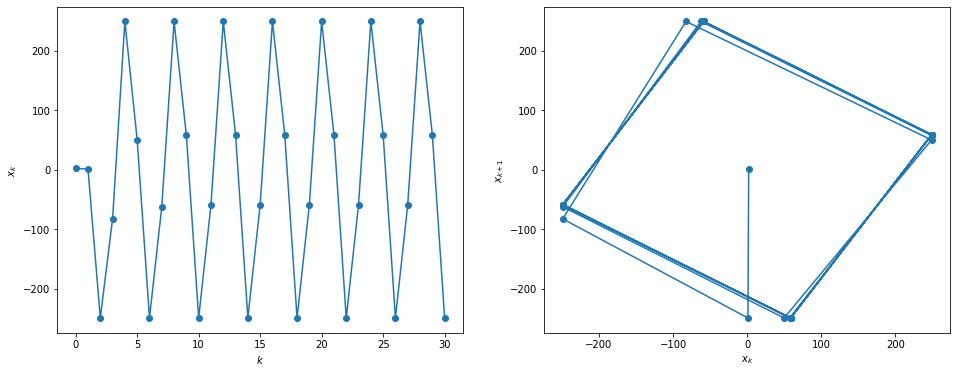

In [4]:
def AA_dynamic(x0, max_iters, L, gradient):
    x_prev = x0
    xs = [x0]
    x_current = x0 - (1./L)*gradient(x_prev)
    for k in range(max_iters):
        xs.append(x_current)
        gradx_curr = gradient(x_current)
        gradx_prev = gradient(x_prev)
        gradiff = gradx_curr - gradx_prev
        
        if np.abs(gradiff) < 1e-20:
            break
        
        x_next = (-gradx_prev*x_current + gradx_curr*x_prev)/gradiff

        x_prev = x_current
        x_current = x_next
    return xs
        
x0 = 2.1
max_iters = 30
L = 25.

f = AAFunc()

xs = AA_dynamic(x0, max_iters, L, f.gradient)        
    
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 6))
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'$x_k$')
ax1.plot(xs,'o-')

ax2.set_xlabel(r'$x_k$')
ax2.set_ylabel(r'$x_{k+1}$')
ax2.plot(xs[0:-1], xs[1:] ,'o-')

Next, we verify that for any $x_0 \in[2.1, 246.98]$:
\begin{align*}
	x_{4n+3} \in (-83,-1), \quad 
	x_{4n+4} =+249, \quad 
	x_{4n+5} \in [1, 245],\quad
	x_{4n+6} = -249, \quad \mbox{for} \quad n=0,1, 2, \ldots,
\end{align*}
which can be found in the proof of Proposition 1 in the paper https://arxiv.org/pdf/1910.08590.pdf.

Text(0, 0.5, '$x_{k+1}$')

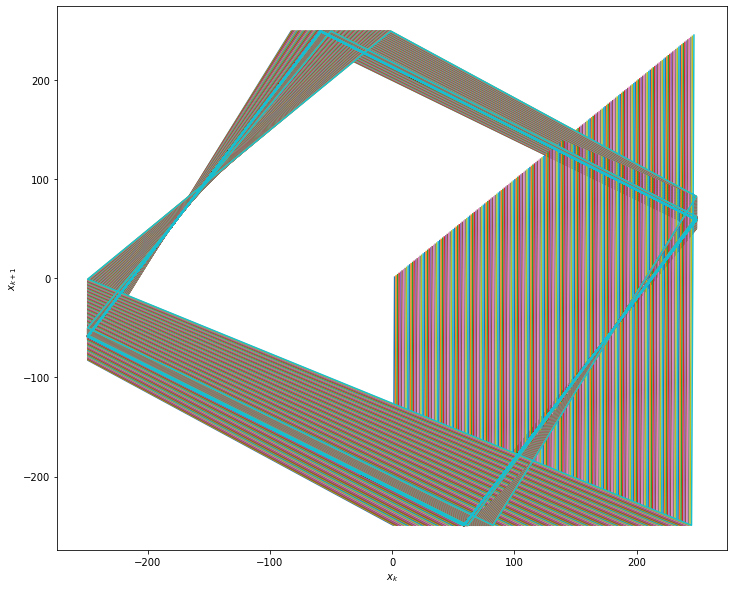

In [5]:
max_iters = 100
L = 25.
f = AAFunc()

fig=plt.figure(figsize=(12, 10))
ic = np.linspace(2.1, 246.98, 200)
for r in ic:
    x0 = r
    xs = AA_dynamic(x0, max_iters, L, f.gradient)        
    plt.plot(xs[0:-1], xs[1:] ,'-')
    
plt.xlabel(r'$x_k$')
plt.ylabel(r'$x_{k+1}$')
